# Estatística - Teste de Hipóteses
- Fernanda Soares Lima - Turma 7 | Data Analytics <br>
Squad Katherine Johnson

Considerando a base de dados experimento_test_ab.csv responda as questões abaixo:


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from tabulate import tabulate ## para fazer tabelas

In [30]:
df_experimento=pd.read_csv('experimento_teste_ab.csv')
df_experimento.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [31]:
df_experimento['Versão_Página'].str.get_dummies().head()

,A,B
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [32]:
df_experimento['Visitante_ID'].value_counts().sum()
len(df_experimento)

2000

In [33]:
df_experimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [34]:
df_experimento.describe()

,Visitante_ID,Visualizações,Conversões
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,150.755500,0.115000
std,577.494589,28.809421,0.319102
min,1.000000,100.000000,0.000000
25%,500.750000,126.000000,0.000000
50%,1000.500000,151.000000,0.000000
75%,1500.250000,175.000000,0.000000
max,2000.000000,199.000000,1.000000


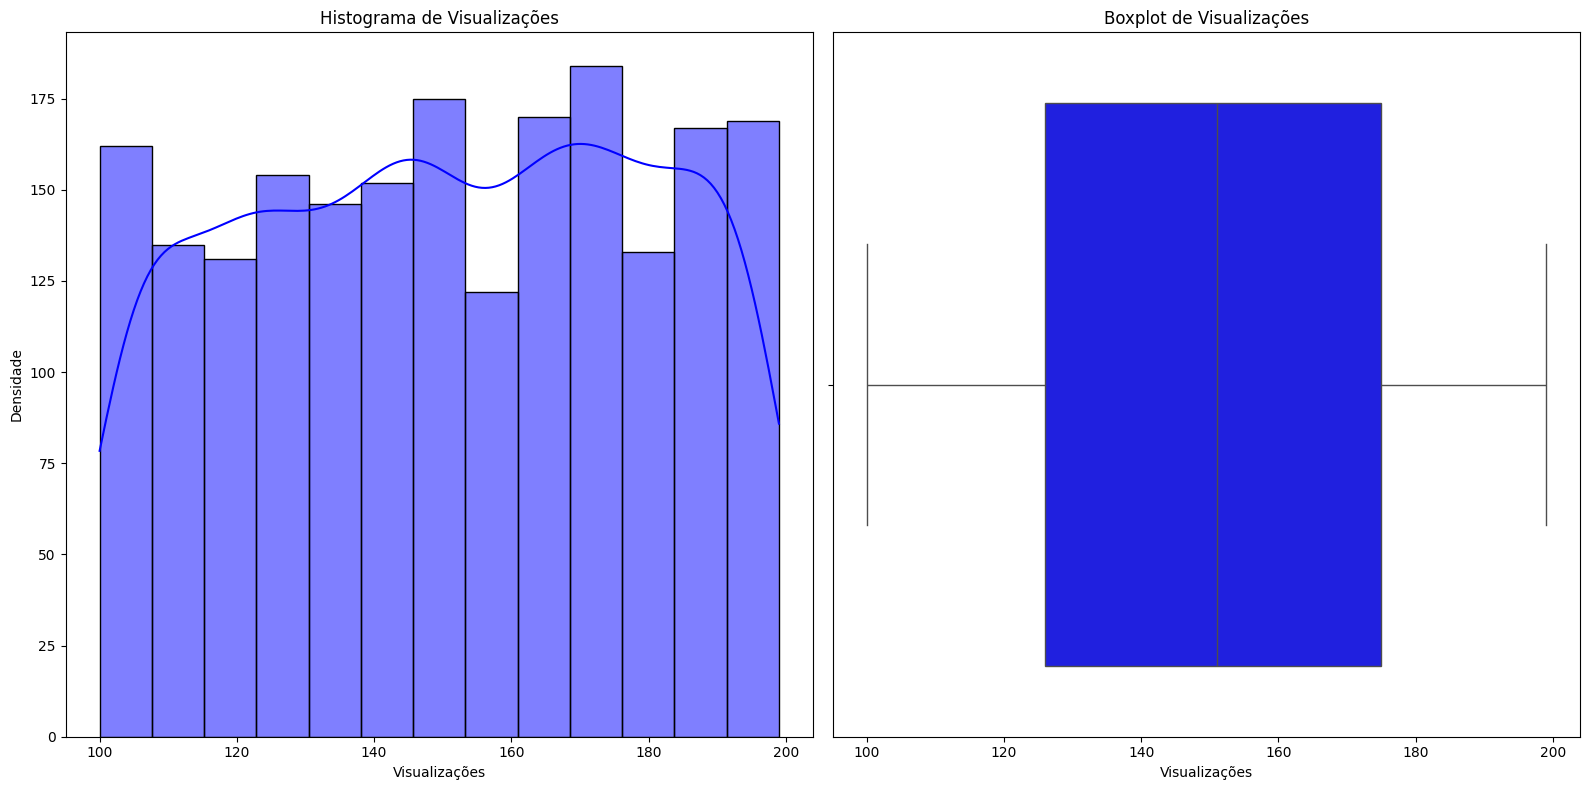

In [35]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.histplot(df_experimento['Visualizações'], kde=True, color='blue')
plt.title(f'Histograma de Visualizações',loc='center')
plt.xlabel('Visualizações')
plt.ylabel('Densidade')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_experimento, x='Visualizações', color='blue')
plt.title(f'Boxplot de Visualizações')
plt.tight_layout()
plt.show()

# Questão 1 
1.	Qual dos cenários tem a maior taxa de conversão?

In [36]:
df_versao_A=df_experimento[df_experimento['Versão_Página']=='A']
df_versao_B=df_experimento[df_experimento['Versão_Página']=='B']

Achei a questão muito mal explicada, mas acredito que tem que ver a quantidade para cada versão

In [37]:
versao_e_visualizacao=df_experimento.groupby('Versão_Página')['Visualizações'].sum()
VerVisu=pd.DataFrame(versao_e_visualizacao)
VerVisu


,Visualizações
Versão_Página,
A,150835
B,150676


In [38]:
versao_e_conversao=df_experimento.groupby('Versão_Página')['Conversões'].sum()
VerConv=pd.DataFrame(versao_e_conversao)
VerConv

,Conversões
Versão_Página,
A,105
B,125


In [39]:
versao_e_conversao.loc['A']

105

In [40]:
VerVisu.loc['A']

Visualizações    150835
Name: A, dtype: int64

In [41]:
valor_A=versao_e_conversao.loc['A']/versao_e_visualizacao.loc['A']
valor_B=versao_e_conversao.loc['B']/versao_e_visualizacao.loc['B']
if valor_A > valor_B:
    print(f"A versão que possui maior valor de conversão é A com {valor_A} de taxa de conversão, ou no caso {round(valor_A*100,2)}%")
elif valor_B > valor_A:
    print(f"A versão que possui maior valor de conversão é B com {valor_B} de taxa de conversão, ou no caso {round(valor_B*100,2)}%")
else:
    print(f"As duas versões possuem a mesma taxa de conversão: {round(valor_A*100,2)}%")

A versão que possui maior valor de conversão é B com 0.0008295946268815207 de taxa de conversão, ou no caso 0.08%


# Questão 2

2.	Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

a.	O cenário A, da base, como o inicial, que funciona hoje.<br>
b.	Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05). <br>
c.	Também considere 80% de certeza conseguir capturar o efeito da nova abordagem. <br>
d.	O aumento para 10% de conversão.



O critério C representa o poder do teste o 1-beta, então no caso 80% é 0.8, e não será feito 1-0.8, pois o 0.8 já é o (1-beta)
Pois no critério diz sobre a certeza de conseguir capturar algo, o Beta sozinha é a probabilidade do teste não encontrar diferença mesmo que exista

O critério D fala sobre um aumento, o que entendo que supõe da conversão desejada acima de conversão atual, que temos uma coluna no conjunto sobre esses dados

In [42]:
# Como já temos A separado em um df vamos usar novamente o df_versao_A já criado na questão 1

# eu acho que isso de conversão é sobre a coluna também
conversao_atual = df_versao_A['Conversões'].mean()
print(f'Taxa de conversão atual (versão A): {conversao_atual:.4f}')

Taxa de conversão atual (versão A): 0.1050


In [43]:
# Nível de significância (alpha) e poder estatistico, o beta
alpha = 0.05
beta = 0.80

conversao_esperada = conversao_atual + (0.10 * conversao_atual) # é 10% maior que a atual

# os valores críticos de Z
z_alpha = stats.norm.ppf(1 - alpha / 2)  #  95% de confiança
z_beta =  beta # stats.norm.ppf(1 - beta)  #  80% de poder do teste

# variancia
variancia = conversao_atual * (1 - conversao_atual)

# delta é a diferença absoluta, esperada maior que atual
delta = conversao_esperada - conversao_atual

n_amostra = ((z_alpha + z_beta) **2 * variancia) / (delta ** 2)

# Exibir o resultado
print(f"Tamanho necessário da amostra por grupo: {np.ceil(n_amostra)}") # arredonda pra maior

Tamanho necessário da amostra por grupo: 6493.0


In [44]:
print(z_alpha)
print(z_beta)

1.959963984540054
0.8


<hr>

Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:

In [45]:
df_pacientes=pd.read_csv('pacientes.csv')
df_pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [46]:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   int64  
 3   Genero             1000 non-null   int64  
 4   Etnia              1000 non-null   int64  
 5   Estado_Saude       1000 non-null   int64  
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [47]:
df_pacientes.Nome_Estado_Saude.value_counts()

Nome_Estado_Saude
Com condições de saúde adicionais    510
Saudável                             490
Name: count, dtype: int64

In [48]:
print(df_pacientes.Etnia.value_counts())
df_pacientes.Nome_Etnia.value_counts()

Etnia
1    260
2    255
3    252
0    233
Name: count, dtype: int64


Nome_Etnia
Afro-americano    260
Hispânico         255
Asiático          252
Caucasiano        233
Name: count, dtype: int64

# Questão 3
3.	Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,  89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

In [49]:
indices= [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,  89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]

amostra_pacientes=df_pacientes[df_pacientes['Unnamed: 0'].isin(indices)]
amostra_pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
36,36,168.708224,41,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
39,39,144.565778,50,0,2,0,Masculino,Hispânico,Saudável
84,84,172.697749,63,0,3,0,Masculino,Asiático,Saudável
89,89,154.485901,41,1,3,0,Feminino,Asiático,Saudável
146,146,157.727254,69,1,0,0,Feminino,Caucasiano,Saudável


In [50]:
len(amostra_pacientes)

44

Hipóteses:

H0 (Hipótese Nula): A média da idade das pessoas com problemas cardíacos é menor ou igual 50 anos. (μ<=50) <br>
H1 (Hipótese Alternativa): A média da idade das pessoas com problemas cardíacos é maior que 50 anos. (μ>50)

Vou utilizar o teste z que compara a média de uma amostra com a média da população, levando em consideração que a nossa amostra é maior que 30 E o desvio padrão da população é conhecido.

In [51]:
amostra_idade_media=np.ceil(amostra_pacientes.Idade.mean()) # 50.29545454545455
amostra_idade_media

populacao_idade_media=df_pacientes['Idade'].mean()  
populacoa_idade_desvio=df_pacientes['Idade'].std() 

n_amostra_pacientes=len(amostra_pacientes)

z_score=(amostra_idade_media-populacao_idade_media) / (populacoa_idade_desvio/np.sqrt(n_amostra_pacientes))

# Valor crítico para um teste unilateral com alfa = 0.05
z_critico=  1.645  # valor crítico da distribuição normal padrão

print(f"Z-Score: {z_score}")
print(f"Z-Crítico: {z_critico}")

if z_score > z_critico:
    print("A Hipótese nula H0 é rejeitada, pois a idade média das pessoas com problemas cardíacos é maior que 50 anos.")
else:
    print("A Hipótese nula H0 não é rejeitada, pois não há evidências suficientes para concluir que a idade média é maior que 50 anos.")


Z-Score: 0.7057374479839013
Z-Crítico: 1.645
A Hipótese nula H0 não é rejeitada, pois não há evidências suficientes para concluir que a idade média é maior que 50 anos.


# Questão 4
4.	Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

A questão fica meio confusa sobre o que quer de cálculo, pois são independentes já que tratam de pessoas diferentes, com estados de saúde diferentes, e também não informou se quer o conjunto original ou com aquele das amostras da questão 3. Mas tentarei fazer uma análise das diferenças dos grupos saudáveis e com condições de saúde.

Como já havia sido feito anteriormente com `df_pacientes.value_counts()`

|Nome_Estado_Saude|Quantidade|
|-------|--------|
|Com condições de saúde adicionais|510|
|Saudável|490||

Lembrando que para o código o Estado de saúde está sendo representado em valores de 0 e 1, 0 sendo para 'Saudável' e 1 para 'Com condições de saúde adicionais'

In [52]:
df_condicoes_saude=df_pacientes[df_pacientes['Estado_Saude']==1]
df_saudavel=df_pacientes[df_pacientes['Estado_Saude']==0]

print(len(df_condicoes_saude),len(df_saudavel))


510 490


Agora vou dividir a amostra anterior também 

In [53]:
df_amostra_condicoes_saude=amostra_pacientes[amostra_pacientes['Estado_Saude']==1]
df_amostra_saudavel=amostra_pacientes[amostra_pacientes['Estado_Saude']==0]

print(len(df_amostra_condicoes_saude),len(df_amostra_saudavel))


19 25


Como são variáveis categóricas onde posso ver apenas quantas pessoas existem naquela categoria decidi fazer o Teste qui-quadrado

O objetivo foi verificar se a divisão entre essas categorias na amostra são independentes da divisão na população total.

In [54]:
observados = pd.DataFrame({
    'Com Condições de Saúde': [len(df_amostra_condicoes_saude), len(df_condicoes_saude)],
    'Saudáveis': [len(df_amostra_saudavel), len(df_saudavel)]
}, index=['Amostra', 'População'])
observados

,Com Condições de Saúde,Saudáveis
Amostra,19,25
População,510,490


In [55]:
chi2, p_valor, gliberdade, esperado = stats.chi2_contingency(observados) # que função complicada mds


print(f"Estatística Qui-quadrado: {chi2}")  # (o-e)^2 / e   onde "o" é o observado e "e" o esperado
print(f"p-valor: {p_valor}")  # p-valor e crítico
print(f"Graus de Liberdade: {gliberdade}") #r-1*c-1
print("Frequências Esperadas:",esperado,"\n")  # total linha x total coluna / total observado

# Verificar se são dependentes ou independentes com base no p-valor
significancia = 0.05
if p_valor<significancia:
    print("As variáveis são dependentes, então a hipótese nula vai ser rejeitada")
else:
    print("As variáveis são independentes, então não se rejeita a hipótese nula")

Estatística Qui-quadrado: 0.7415757099691842
p-valor: 0.3891565891252817
Graus de Liberdade: 1
Frequências Esperadas: [[ 22.29501916  21.70498084]
 [506.70498084 493.29501916]] 

As variáveis são independentes, então não se rejeita a hipótese nula


In [56]:
observados

,Com Condições de Saúde,Saudáveis
Amostra,19,25
População,510,490


In [57]:
esperados = pd.DataFrame(esperado, index=['Amostra', 'População'], columns=['Com Condições de Saúde', 'Saudáveis'])
esperados

,Com Condições de Saúde,Saudáveis
Amostra,22.295019,21.704981
População,506.704981,493.295019


Se o p-valor fosse menor que 0.05 teria que concluir que havia dependência entre os grupos, porém como é visto os grupos são independentes. Isso indica que as categorias na amostra são distribuídas de forma semelhante à população, sugerindo independência. E como podemos ver o valor esperado é próximo do observado, além o p-valor ter dado maior que o crítico

# Questão 5
5.	Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe,  índices = ([690, 894,  67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174, 105, 693,   6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

In [58]:
indices2 = [690, 894,  67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174, 105, 693,   6, 462, 973, 607, 811, 346, 354, 966, 943, 372]
amostra_pacientes_2=df_pacientes[df_pacientes['Unnamed: 0'].isin(indices2)]
amostra_pacientes_2.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
6,6,150.750643,52,1,2,1,Feminino,Hispânico,Com condições de saúde adicionais
19,19,160.089332,38,1,1,0,Feminino,Afro-americano,Saudável
60,60,161.136755,35,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
67,67,158.427577,45,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
105,105,151.920500,34,0,3,1,Masculino,Asiático,Com condições de saúde adicionais


In [59]:
len(amostra_pacientes_2)

26

In [60]:
amostra_pacientes_2['Nome_Estado_Saude'].value_counts()

Nome_Estado_Saude
Com condições de saúde adicionais    15
Saudável                             11
Name: count, dtype: int64

Hipóteses:

Hipótese Nula (H0): As médias de pressão arterial dos dois grupos são iguais.<br>
Hipótese Alternativa (H1): As médias de pressão arterial dos dois grupos são diferentes.

In [61]:
df_amostra_condicoes_saude=amostra_pacientes_2[amostra_pacientes_2['Estado_Saude']==1]
df_amostra_saudavel=amostra_pacientes_2[amostra_pacientes_2['Estado_Saude']==0]

print(len(df_amostra_condicoes_saude),len(df_amostra_saudavel))

15 11


Comecei a fazer manual porém dava alguns erros, aí encontrei uma função do stats.ttest que já faz o teste_t

Porém ainda fui atrás pra saber a fundo como fazia o cálculo manualmente por código, a diferença é pouca, mas resulta no mesmo

Manualmente

In [62]:
amostra2_condicoes_pressao_media=df_amostra_condicoes_saude['Pressao_Arterial'].mean()
amostra2_saudavel_pressao_media=df_amostra_saudavel['Pressao_Arterial'].mean()


print("Pressão com condições de saúde:",amostra2_condicoes_pressao_media,"Pressão de pessoas saudáveis:",amostra2_saudavel_pressao_media)
# Significância 6%
alpha=0.06

# Fazendo pelo cálculo manualmente

n_condicoes= len(df_amostra_condicoes_saude)
n_saudavel= len(df_amostra_saudavel)

std_condicoes= df_amostra_condicoes_saude['Pressao_Arterial'].std()
std_saudavel= df_amostra_saudavel['Pressao_Arterial'].std()

 # O cálculo normal não funciona se não for amostra e população. Então fui atrás de outra forma que faça teste t por amostras independentes
#f= (amostra2_condicoes_pressao_media-amostra2_saudavel_pressao_media)/(amostra_pacientes_2['Pressao_Arterial'].std()/len(amostra_pacientes_2))


# Cálculo do erro padrão combinado
erro_padrao_combinado= np.sqrt((std_condicoes**2 / n_condicoes) + (std_saudavel**2 / n_saudavel))


t= (amostra2_condicoes_pressao_media - amostra2_saudavel_pressao_media) / erro_padrao_combinado

grau_liberdade= (n_condicoes + n_saudavel - 2)

# Calcular o p-valor pela estatística t
p_valor_manual= 2 * (1 - stats.t.cdf(abs(t), df=grau_liberdade))

print(f"Estatística t manual: {t}")
print(f"p-valor manual: {p_valor_manual}")

if p_valor_manual< alpha:
    print("A Hipótese nula H0 é rejeitada, pois as médias de pressão arterial são significativamente diferentes entre os grupos.")
else:
    print("A Hipótese nula H0 não é rejeitada, pois não há evidências que as médias de pressão arterial sejam diferentes entre os grupos.")


Pressão com condições de saúde: 153.1972544980592 Pressão de pessoas saudáveis: 152.94305165531088
Estatística t manual: 0.08304391716459121
p-valor manual: 0.934505381287168
A Hipótese nula H0 não é rejeitada, pois não há evidências que as médias de pressão arterial sejam diferentes entre os grupos.


Utilizando função `stats.ttest_ind`

In [63]:
pressao_condicoes_saude = df_amostra_condicoes_saude['Pressao_Arterial']
pressao_saudavel = df_amostra_saudavel['Pressao_Arterial']

t_stat, p_valor = stats.ttest_ind(pressao_condicoes_saude, pressao_saudavel)

# Resultados
print(f"Estatística t: {t_stat}")
print(f"p-valor: {p_valor}")

# Verificar se rejeita ou não a hipótese nula
significancia = 0.06
if p_valor < significancia:
    print("A Hipótese nula H0 é rejeitada, pois as médias de pressão arterial são significativamente diferentes entre os grupos.")
else:
    print("A Hipótese nula H0 não é rejeitada, pois não há evidências que as médias de pressão arterial sejam diferentes entre os grupos.")

Estatística t: 0.08124024162327208
p-valor: 0.9359246016248557
A Hipótese nula H0 não é rejeitada, pois não há evidências que as médias de pressão arterial sejam diferentes entre os grupos.


# Questão 6
6.	Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%) <bR>


### a.	Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.<br>

In [64]:
etnia_pressao=df_pacientes.groupby('Nome_Etnia')['Pressao_Arterial'].mean()
etnia_pressao

Nome_Etnia
Afro-americano    150.727553
Asiático          150.330899
Caucasiano        149.983045
Hispânico         150.419697
Name: Pressao_Arterial, dtype: float64

Teste ANOVA ou Teste F deve ser feito pois pode compara médias de 3 ou mais grupos

Fiz visualmente com groupby porém a função stats.f_oneway não funciona colocando `F, p = stats.f_oneway(etnia_pressao.values)`

Então preciso dividir cada etnia e pegando a pressão de cada, pois o ANOVA vai ver todos os valores

In [65]:
afro_americano= df_pacientes[df_pacientes['Nome_Etnia']== 'Afro-americano']['Pressao_Arterial']
asiatico= df_pacientes[df_pacientes['Nome_Etnia']== 'Asiático']['Pressao_Arterial']
caucasiano= df_pacientes[df_pacientes['Nome_Etnia']== 'Caucasiano']['Pressao_Arterial']
hispanico= df_pacientes[df_pacientes['Nome_Etnia']== 'Hispânico']['Pressao_Arterial']

# Aplicar o teste ANOVA
F, p= stats.f_oneway(afro_americano, asiatico, caucasiano, hispanico)

# Exibir os resultados
print(f"Estatística F: {F}")
print(f"Valor p: {p}")

alpha_anova=0.05

if p < alpha_anova:
    print("A Hipótese nula H0 é rejeitada, pois as médias de pressão arterial são significativamente diferentes entre os grupos.")
else:
    print("A Hipótese nula H0 não é rejeitada, pois não há evidências que as médias de pressão arterial sejam diferentes entre os grupos. \nO que quer dizer que a pressão arterial média é a mesma em todos os grupos étnicos.")

Estatística F: 0.2324529626159684
Valor p: 0.873800123850745
A Hipótese nula H0 não é rejeitada, pois não há evidências que as médias de pressão arterial sejam diferentes entre os grupos. 
O que quer dizer que a pressão arterial média é a mesma em todos os grupos étnicos.


### b.	Existe uma associação entre a idade dos pacientes e sua pressão arterial?<br>
         i.	Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial.<br>
         ii.	Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.<br>

In [66]:
print(df_pacientes.groupby('Idade')['Pressao_Arterial'].mean().head())

len(df_pacientes['Idade'].value_counts())   # São 41 idades diferentes, e algumas idades tem 20 à 34 pessoas com a mesma idade

Idade
30    145.015044
31    148.390218
32    153.864101
33    152.756585
34    149.209530
Name: Pressao_Arterial, dtype: float64


41

Associar a idade e a pressão arterial é preciso utilizar uma análise de correlação entre as duas variáveis. Nesse caso, o teste mais adequado seria o coeficiente de correlação de Pearson, já que ele mede a força e a direção da relação linear entre variáveis contínuas.

In [67]:
df_pacientes = df_pacientes.sort_values('Unnamed: 0')

correlacao_idade, p_idade_pressao = stats.pearsonr(df_pacientes['Idade'], df_pacientes['Pressao_Arterial'])

print(f"Correlação de Pearson: {correlacao_idade}")
print(f"Valor p: {p_idade_pressao}")

alpha= 0.05
if p_idade_pressao< alpha:
    print("Há uma correlação significativa entre idade e pressão arterial,então rejeita-se H0.")
else:
    print("Não há evidências de correlação entre idade e pressão arterial, então não se rejeita H0.")

Correlação de Pearson: -0.02138535693464897
Valor p: 0.4993608212055468
Não há evidências de correlação entre idade e pressão arterial, então não se rejeita H0.


Como interpretar o valor de Pearson?

Coeficiente de correlação de Pearson: O valor pode variar de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita). Se o valor for próximo de 0, indica pouca ou nenhuma correlação.

- r=1: Correlação positiva perfeita (à medida que uma variável aumenta, a outra também aumenta).

- r=−1: Correlação negativa perfeita (à medida que uma variável aumenta, a outra diminui).

- r=0: Nenhuma correlação linear.

O valor-p informa a probabilidade de observar essa correlação "r" por acaso se a hipótese nula (que afirma que não há correlação) for verdadeira. Se o p-valor for menor que o nível de significância (α, geralmente 0,05), rejeitamos a hipótese nula e aceitamos que existe uma correlação significativa.

### c.	Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

Acho que essa questão não é válida, já que foi testado pelo ANOVA na alternativa "a)" que não há diferença significativa entre os grupos, ou seja, não há suporte para a hipótese alternativa.

Então vou fazer alguns plots aqui

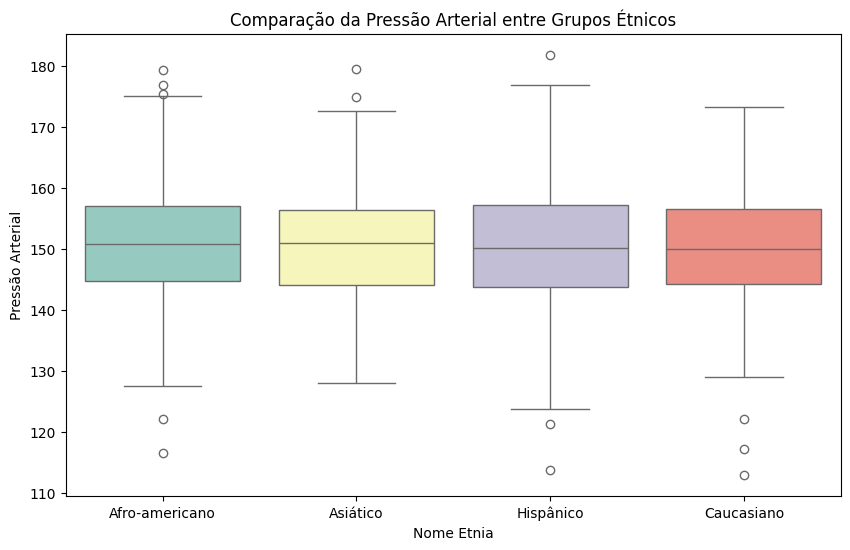

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pacientes, x='Nome_Etnia', y='Pressao_Arterial', palette='Set3',hue='Nome_Etnia')
plt.title('Comparação da Pressão Arterial entre Grupos Étnicos')
plt.ylabel('Pressão Arterial')
plt.xlabel('Nome Etnia')
plt.show()

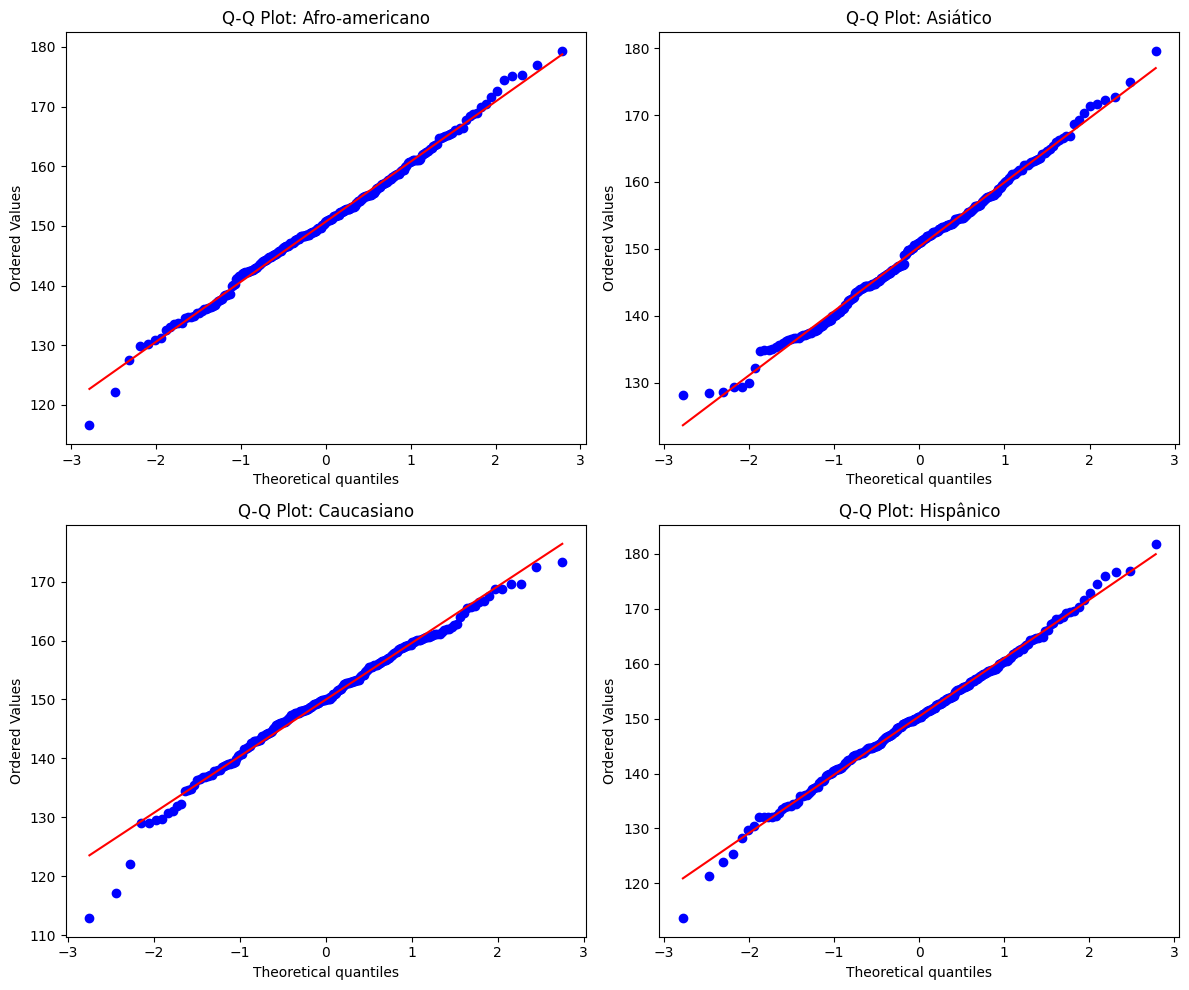

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

stats.probplot(afro_americano, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot: Afro-americano')

stats.probplot(asiatico, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot: Asiático')

stats.probplot(caucasiano, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Caucasiano')

stats.probplot(hispanico, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Hispânico')

plt.tight_layout()
plt.show()

# Questão 7
7.	Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

In [70]:
df_pacientes.columns

Index(['Unnamed: 0', 'Pressao_Arterial', 'Idade', 'Genero', 'Etnia',
       'Estado_Saude', 'Nome_Genero', 'Nome_Etnia', 'Nome_Estado_Saude'],
      dtype='object')

Para fazer o qui-quadrado:

Criar Tabela de Contingência: tabela onde as linhas representam as categorias de condições de saúde (com condições vs saudável) e as colunas representam os gêneros (feminino vs masculino).

Aí usa o teste qui-quadrado para verificar se há uma relação significativa entre gênero e condições de saúde adicionais.

In [71]:
df_pacientes[['Nome_Estado_Saude','Nome_Genero','Unnamed: 0']].groupby(['Nome_Estado_Saude','Nome_Genero']).count()

Unnamed: 0
Nome_Estado_Saude                 Nome_Genero            
Com condições de saúde adicionais Feminino            257
                                  Masculino           253
Saudável                          Feminino            246
                                  Masculino           244

In [72]:
df_pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


Existe uma função que gera tabela rapidamente!!! `pd.crosstab`

Muito mais rapido de quando eu fiz ela dividindo por saudável e não saudável para amostra e população

In [73]:
tabela_saude_genero= pd.crosstab(df_pacientes['Nome_Estado_Saude'], df_pacientes['Nome_Genero'] )

print(tabela_saude_genero)


Nome_Genero                        Feminino  Masculino
Nome_Estado_Saude                                     
Com condições de saúde adicionais       257        253
Saudável                                246        244


In [74]:
pd.crosstab(df_pacientes['Nome_Estado_Saude'],amostra_pacientes['Nome_Estado_Saude'])

Nome_Estado_Saude,Com condições de saúde adicionais,Saudável
Nome_Estado_Saude,,
Com condições de saúde adicionais,19,0
Saudável,0,25


Muito mais fácil fazendo com a função do que como foi realizado aqui embaixo:

In [75]:
observados = pd.DataFrame({
    'Feminino': [len(df_pacientes[(df_pacientes['Nome_Genero']=='Feminino') & (df_pacientes['Estado_Saude']==1)]), len(df_pacientes[(df_pacientes['Nome_Genero']=='Feminino') & (df_pacientes['Estado_Saude']==0)])],
    'Masculino': [len(df_pacientes[(df_pacientes['Nome_Genero']=='Masculino') & (df_pacientes['Estado_Saude']==1)]), len(df_pacientes[(df_pacientes['Nome_Genero']=='Masculino') & (df_pacientes['Estado_Saude']==0)])]
}, index=['Com Condições de Saúde', 'Saudáveis'])
observados

,Feminino,Masculino
Com Condições de Saúde,257,253
Saudáveis,246,244


In [76]:

from scipy.stats import chi2_contingency

chi2, p_saude_genero, grau, freq_esperado= chi2_contingency(tabela_saude_genero)

print(f"Qui-quadrado: {chi2}")
print(f"Valor p: {p_saude_genero}")
print(f"Graus de liberdade: {grau}")
print("Tabela esperada:")
print(freq_esperado)

alpha= 0.05
if p_saude_genero< alpha:
    print("Há uma correlação significativa entre condição de saúde e gênero,então rejeita-se H0.")
else:
    print("Não há evidências de correlação entre condição de saúde e gênero, então não se rejeita H0.")

Qui-quadrado: 0.0
Valor p: 1.0
Graus de liberdade: 1
Tabela esperada:
[[256.53 253.47]
 [246.47 243.53]]
Não há evidências de correlação entre condição de saúde e gênero, então não se rejeita H0.


# Questão 8 
8.	Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

In [77]:
desviopadrao = df_condicoes_saude['Pressao_Arterial'].std()
media = df_condicoes_saude['Pressao_Arterial'].mean()

In [78]:
conf_int = stats.norm.interval(0.95, loc=media, scale=desviopadrao)
print(f"Média: {media:,.2f}")
print("Intervalo de confiança: ")
print(conf_int)

Média: 150.12
Intervalo de confiança: 
(129.8705879067565, 170.3663159835586)


# Questão 9
9.	A distribuição da pressão arterial na população segue uma distribuição normal?<br>
a.	Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.<br>
b.	Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.



In [79]:
pressao_arterial = df_pacientes['Pressao_Arterial']

ks, p_ks = stats.kstest(pressao_arterial, 'norm', args=(pressao_arterial.mean(), pressao_arterial.std()))

print(f"Estatística K-S: {ks}")
print(f"Valor p: {p_ks}")

# Nível de significância
alpha = 0.05

if p_ks < alpha:
    print("A Hipótese nula H0 é rejeitada, indicando que a distribuição da pressão arterial não segue uma distribuição normal.")
else:
    print("A Hipótese nula H0 não é rejeitada, a distribuição da pressão arterial segue uma distribuição normal.")

Estatística K-S: 0.02051963188317471
Valor p: 0.7856894546948019
A Hipótese nula H0 não é rejeitada, a distribuição da pressão arterial segue uma distribuição normal.
